### Test how migration histories change when 1) only using SNVs in copy number neutral regions, 2) using MACHINA's clsutering, and 3) SPRUCE generated trees

In [1]:
import sys
import pandas as pd
import os
from metient.metient import *
from metient.util import data_extraction_util as dutil

repo_dir = os.path.join(os.getcwd(), "../")
data_dir = os.path.join(repo_dir, 'data', 'sanborn_melanoma_2015')
TREE_DIR = os.path.join(data_dir, 'spruce_mutation_trees')    
TSV_DIR = os.path.join(data_dir, 'machina_clustering')    

print_config = PrintConfig(visualize=True, k_best_trees=20)
OUTPUT_DIR = os.path.join(data_dir, "metient_outputs_no_cna_mach_cluster_spruce_trees")
COLORS = ["#6aa84fff","#c27ba0ff", "#e69138ff", "#be5742e1", "#2496c8ff", "#674ea7ff"]
PATIENTS = ["A", "B", "C", "D", "E", "F", "G"]

idx_to_labels = []
# Prep inputs for Metient
for patient_id in PATIENTS:
    tsv_fn = os.path.join(TSV_DIR, f"{patient_id}_0.95.tsv")
    df = pd.read_csv(tsv_fn, sep="\t",skiprows=3)
    print(patient_id)
    df['num_mutations'] = df.apply(lambda row: len(row['character_label'].split("_")), axis=1)
    df['site_category'] = df.apply(lambda row: 'primary' if row['sample_label']=='primary' else 'metastasis', axis=1)
    df['var_read_prob'] = 0.5
    
    # This is to fix the fact the SPRUCE will filter out some of the clustered mutations. We fix this by
    # removing those mutation clusters from the input TSVs
    unpruned_idx_to_label = pd.Series(df['character_label'].values, index=df['character_index']).to_dict()
    mut_tree_fn = os.path.join(TREE_DIR, f"{patient_id}_mut_trees.txt")
    _, pruned_idx_to_label = dutil.get_adj_matrices_from_spruce_mutation_trees(mut_tree_fn, unpruned_idx_to_label)[0]
    pruned_label_to_idx = {v:k for k,v in pruned_idx_to_label.items()}
    print("pruned", len(unpruned_idx_to_label)-len(pruned_idx_to_label), "mutation clusters")
    df = df[df['character_label'].isin(list(pruned_idx_to_label.values()))]
    df['character_index'] = df.apply(lambda row:pruned_label_to_idx[row['character_label']], axis=1)

    idx_to_labels.append(pruned_idx_to_label)
    df['full_label'] = df['character_label']
    df['character_label'] = df.apply(lambda row:dutil.get_pruned_mut_label(row['character_label'], "_", ":"), axis=1)
    df.to_csv(os.path.join(TSV_DIR,f"{patient_id}_metient_input.tsv"), sep="\t")
    

CUDA GPU: False
A
pruned 0 mutation clusters
B
pruned 1 mutation clusters
C
pruned 0 mutation clusters
D
pruned 0 mutation clusters
E
pruned 0 mutation clusters
F
pruned 0 mutation clusters
G
pruned 0 mutation clusters


[array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 1., 0.]]), array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 1., 1., 0.]]), array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0.]]), array([[0., 0.],
       [1., 0.]]), array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0.]]), array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 1., 1., 0.]]), array([[0., 0., 0.],
       [0., 0., 0.],
       [1., 1., 0.]])]
Saving results to /lila/data/morrisq/divyak/projects/metient/metient/j

/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:317: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A.T, remove_self_loops=False), dtype = torch.float32)
  0%|          | 0/75 [00:00<?, ?it/s]/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:308: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)
100%|██████████| 75/75 [00:00<00:00, 128.78it/s]


{'primary single-source seeding': 8, 'not primary single-source seeding': 9}
# final solutions: 2
Calibrating for patient: B_calibrate
Calculated batch size: 512
Restructuring adjacency matrix for B_calibrate_primary since root node is not at index 0
[3, 1, 2, 0]
[[0. 1. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]] 
 tensor([[10023.,   645.,   948.,   142.],
        [12909.,   559.,   845.,   153.],
        [ 6998.,   517.,   629.,    95.],
        [13853.,   776.,   967.,   139.]]) 
 tensor([[7.0340e+03, 0.0000e+00, 1.0000e+00, 0.0000e+00],
        [1.5030e+03, 0.0000e+00, 9.5000e+01, 0.0000e+00],
        [5.0640e+03, 1.4100e+02, 0.0000e+00, 0.0000e+00],
        [4.3430e+03, 1.0000e+00, 0.0000e+00, 4.5000e+01]]) 
 {0: 'KIAA1107_BCL9', 1: 'DCLK1_DLL4', 2: 'RAD51AP2_SIDT1', 3: 'PHYHIPL'} 
 tensor([[0.0000, 0.5000, 0.3333, 0.1667],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000]])


100%|██████████| 75/75 [00:00<00:00, 137.73it/s]


{'primary single-source seeding': 8}
# final solutions: 8
Calibrating for patient: C_calibrate
Calculated batch size: 512
Restructuring adjacency matrix for C_calibrate_primary since root node is not at index 0
[4, 1, 2, 3, 0]
[[0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]] 
 tensor([[232357.,   1260.,   4300.,   3880.,   3238.],
        [166433.,    756.,   4399.,   3706.,   3257.],
        [248537.,   1634.,   4987.,   3652.,   3156.]]) 
 tensor([[7.0237e+04, 0.0000e+00, 6.4400e+02, 6.5000e+01, 2.4000e+01],
        [1.1165e+05, 5.0200e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [7.6776e+04, 0.0000e+00, 0.0000e+00, 7.9500e+02, 6.5700e+02]]) 
 {0: 'JAK1_NRAS', 1: 'GPR128_CARS2', 2: 'FAT1', 3: 'CTNNB1', 4: 'CADM3_TTN'} 
 tensor([[0.0000, 0.0513, 0.4872, 0.2564, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.2051],
        [0.0000, 0.00

100%|██████████| 75/75 [00:00<00:00, 135.47it/s]


{'primary single-source seeding': 6}
# final solutions: 1
Calibrating for patient: D_calibrate
Calculated batch size: 512
Restructuring adjacency matrix for D_calibrate_primary since root node is not at index 0
[1, 0]
[[0. 1.]
 [0. 0.]] 
 tensor([[2500.,   93.],
        [2446.,   72.],
        [1633.,   59.],
        [1699.,   45.]]) 
 tensor([[ 792.,    0.],
        [ 993.,   44.],
        [1040.,   27.],
        [1280.,   33.]]) 
 {0: 'ASXL3_PIK3C3', 1: 'ZNF407'} 
 tensor([[0., 1.],
        [0., 0.]])


100%|██████████| 75/75 [00:00<00:00, 122.59it/s]


{'primary single-source seeding': 9, 'not primary single-source seeding': 11}
# final solutions: 1
Calibrating for patient: E_calibrate
Calculated batch size: 1024
Restructuring adjacency matrix for E_calibrate_primary since root node is not at index 0
[6, 1, 2, 3, 4, 5, 0, 7]
[[0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]] 
 tensor([[6259.,  669.,   56., 1823.,  554.,  830.,  664.,  405.],
        [6938.,  978.,   88., 2186.,  373., 1625.,  890.,  283.],
        [7570.,  568.,   66., 2468.,  405., 1808.,  986.,  301.],
        [6399.,  938.,   91., 1367.,  350., 1321.,  822.,  268.],
        [5991.,  738.,   82., 2072.,  294., 1567.,  484.,  229.]]) 
 tensor([[3.8910e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00, 2.9900e+02,
         0.0000e+00, 6.0000e+00],
        [5.5440e+03, 1.7000e+01, 1.0000e+00, 0.0000e+00

100%|██████████| 75/75 [00:00<00:00, 89.93it/s]


{'primary single-source seeding': 11, 'not primary single-source seeding': 11}
# final solutions: 24
Calibrating for patient: F_calibrate
Calculated batch size: 512
Restructuring adjacency matrix for F_calibrate_primary since root node is not at index 0
[4, 1, 2, 3, 0]
[[0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] 
 tensor([[3.6425e+05, 7.0200e+02, 2.4200e+02, 1.9400e+02, 4.9900e+02],
        [4.1847e+05, 8.4100e+02, 2.1300e+02, 2.7600e+02, 6.2600e+02],
        [3.8240e+05, 4.9800e+02, 1.3900e+02, 2.0100e+02, 2.9500e+02],
        [3.8090e+05, 5.9700e+02, 1.8100e+02, 2.4700e+02, 5.3300e+02]]) 
 tensor([[1.6642e+05, 0.0000e+00, 0.0000e+00, 3.4000e+01, 0.0000e+00],
        [1.4787e+05, 0.0000e+00, 6.1000e+01, 0.0000e+00, 2.0000e+00],
        [8.3684e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 8.3000e+01],
        [1.3414e+05, 9.4000e+01, 5.7000e+01, 0.0000e+00, 0.0000e+00]]) 
 {0: 'MACF1_MACF1', 1: 'LY75-CD302_FBXO18', 2: 'DOCK10_ABCA8', 3: 'TXNDC

100%|██████████| 75/75 [00:00<00:00, 114.85it/s]


{'primary single-source seeding': 18, 'not primary single-source seeding': 21}
# final solutions: 1
Calibrating for patient: G_calibrate
Calculated batch size: 512
Restructuring adjacency matrix for G_calibrate_primary since root node is not at index 0
[2, 1, 0]
[[0. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]] 
 tensor([[10833.,   419.,   111.],
        [ 7865.,   278.,    68.],
        [10310.,   215.,   140.]]) 
 tensor([[4676.,    0.,    0.],
        [3511.,    0.,   29.],
        [8739.,  199.,    0.]]) 
 {0: 'FAT1', 1: 'SHISA3', 2: 'ABLIM2'} 
 tensor([[0.0000, 0.5000, 0.5000],
        [0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000]])


100%|██████████| 75/75 [00:00<00:00, 148.70it/s]


{'primary single-source seeding': 6}
# final solutions: 4
Calibrating to 7 patients
Early stopping after 31 epochs.
Optimized thetas: tensor([0.3344, 0.3333, 0.3322], grad_fn=<DivBackward0>)


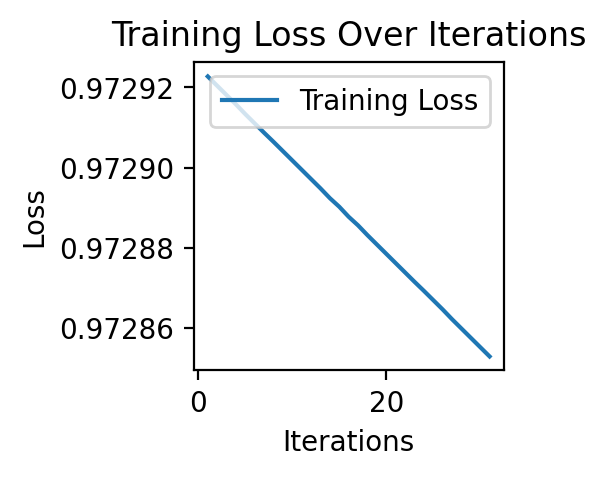

A_calibrate_primary
20 unique trees were not found (2 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

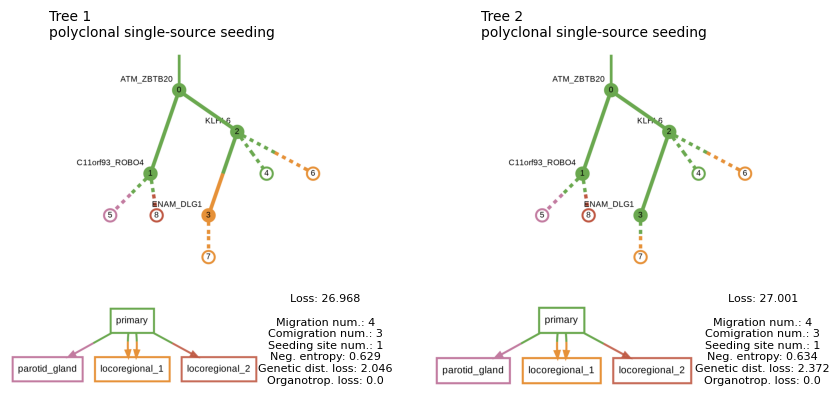

/lila/data/morrisq/divyak/projects/metient/metient/util/vertex_labeling_util.py:308: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(get_path_matrix(A, remove_self_loops=True), dtype = torch.float32)


B_calibrate_primary
20 unique trees were not found (8 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

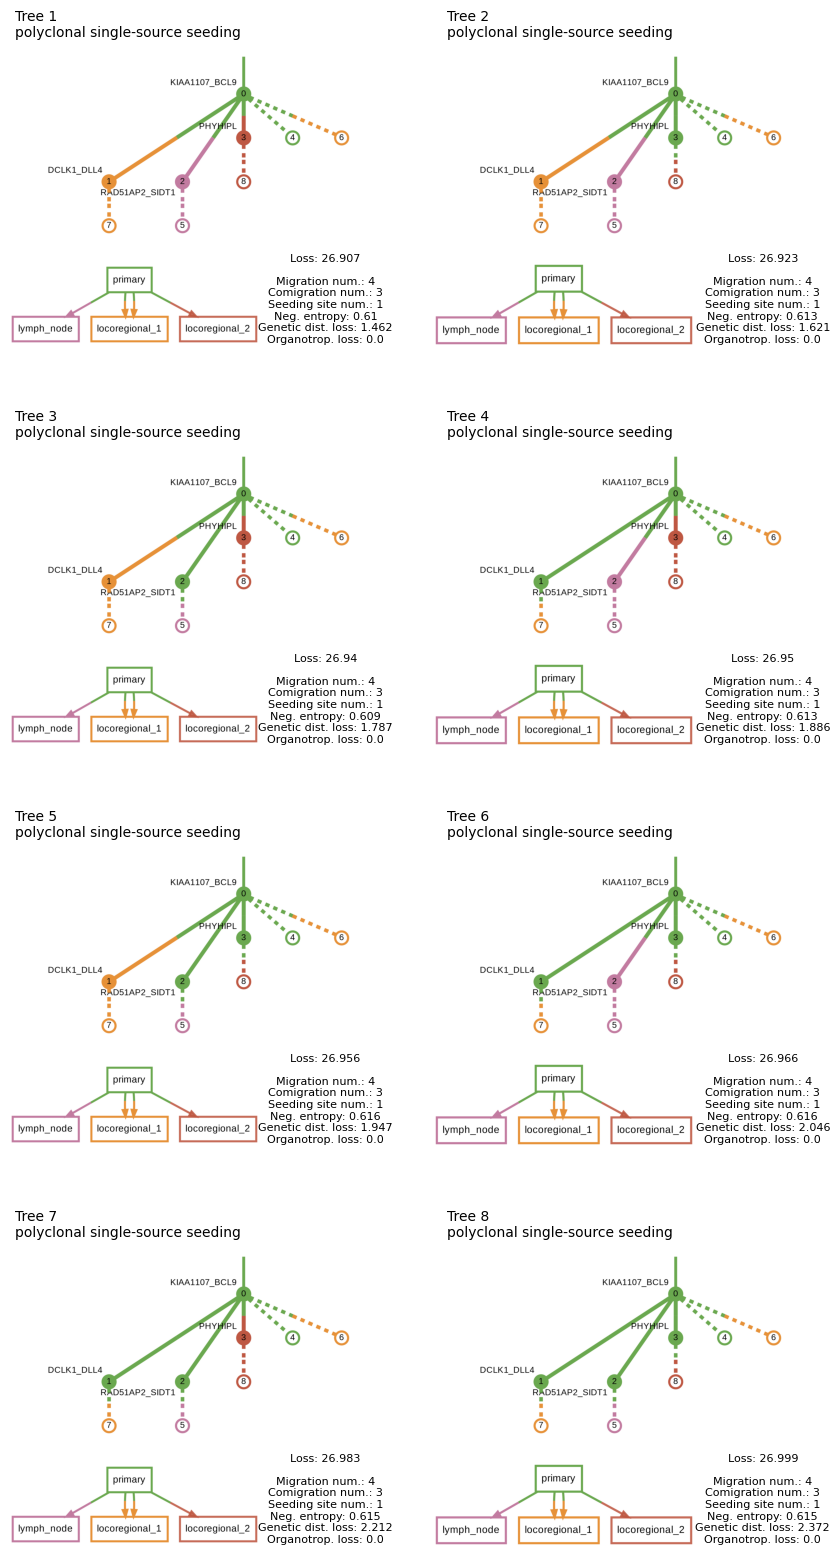

C_calibrate_primary
20 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

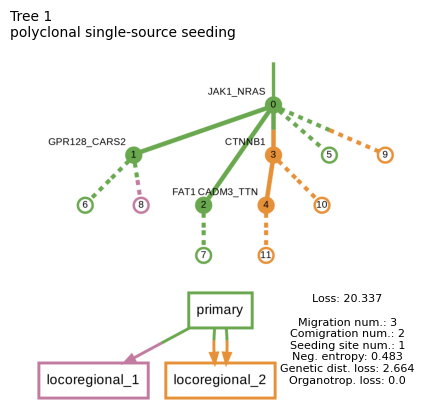

D_calibrate_primary
20 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

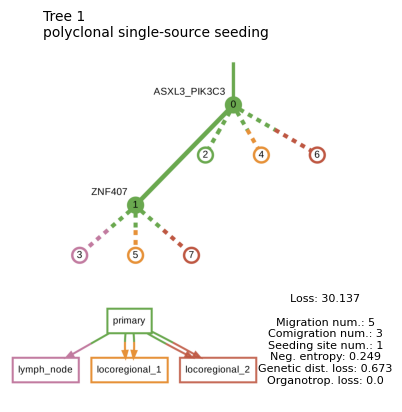

E_calibrate_primary


<Figure size 640x480 with 0 Axes>

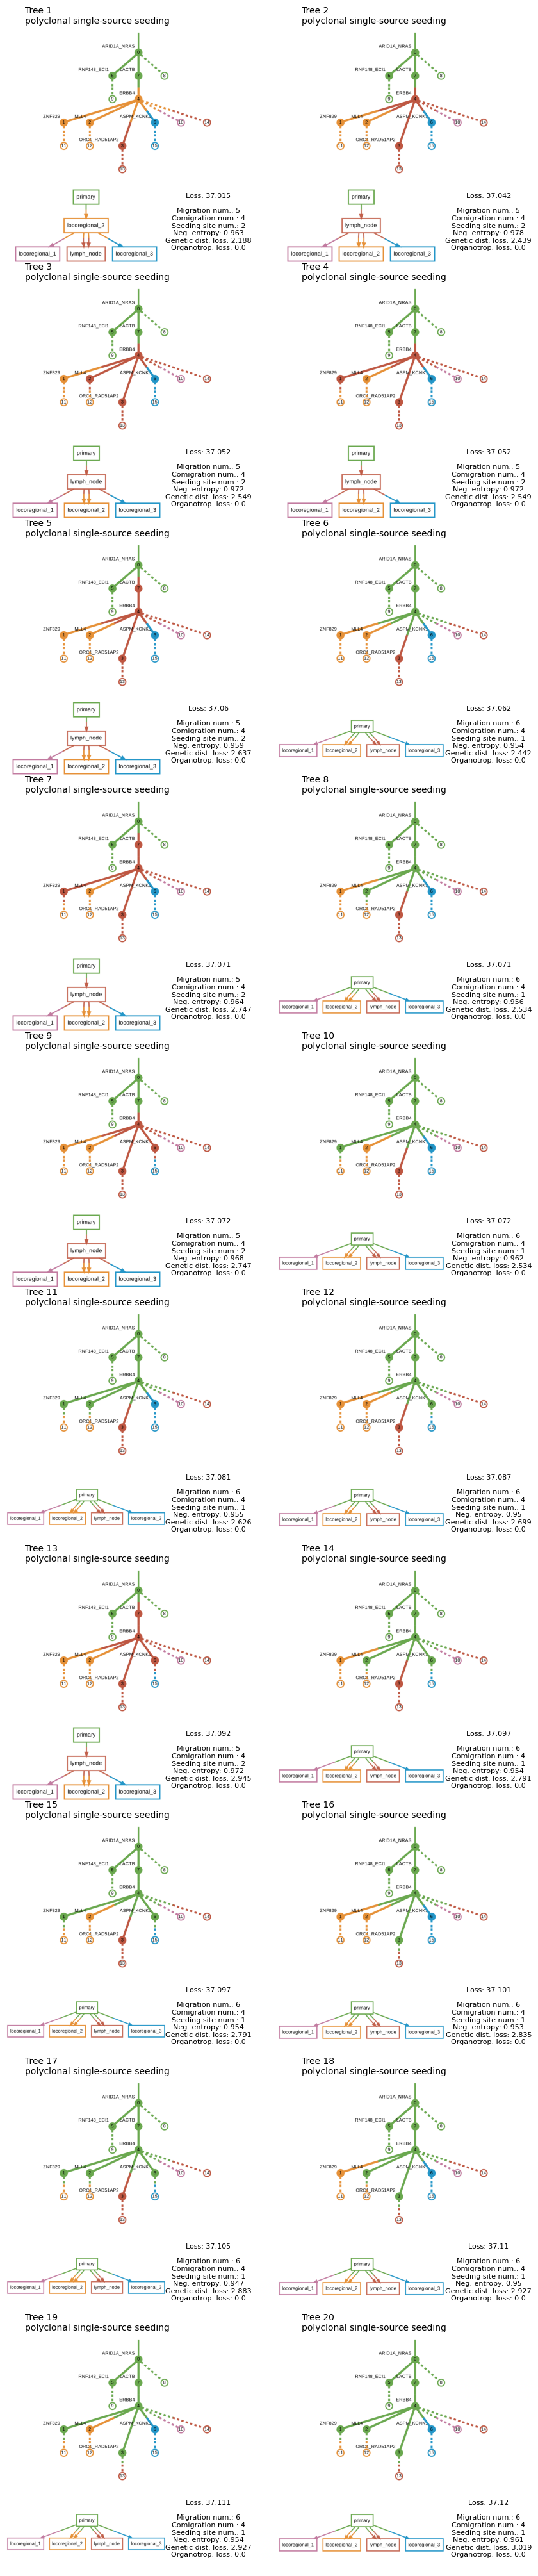

F_calibrate_primary
20 unique trees were not found (1 was found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

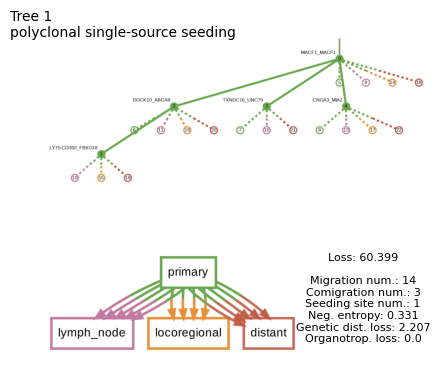

G_calibrate_primary
20 unique trees were not found (4 were found). Retry with a higher sample size if you want to get more trees.


<Figure size 640x480 with 0 Axes>

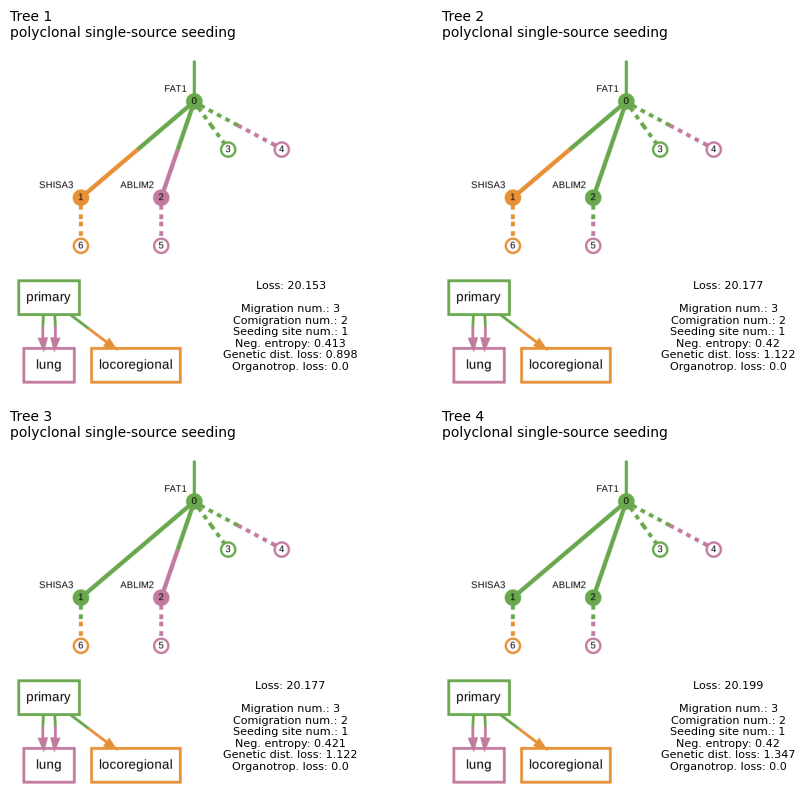

[0.3344487249851227, 0.3333320617675781, 0.3322192132472992]

In [2]:
mut_trees_fns = [os.path.join(TREE_DIR, f"{patient_id}_mut_trees.txt") for patient_id in PATIENTS]
ref_var_fns = [os.path.join(TSV_DIR, f"{patient_id}_metient_input.tsv") for patient_id in PATIENTS]

trees = []
for mut_tree_fn,idx_to_label in zip(mut_trees_fns, idx_to_labels):
    tree, pruned_idx_to_label = dutil.get_adj_matrices_from_spruce_mutation_trees(mut_tree_fn, idx_to_label)[0]
    assert(idx_to_label==pruned_idx_to_label)
    trees.append(tree)
print(trees)
run_names = [f"{pid}_calibrate" for pid in PATIENTS]
calibrate(trees, ref_var_fns, print_config, OUTPUT_DIR, run_names, bias_weights=True, custom_colors=COLORS, solve_polytomies=False)
